# Custom Training Basics

In this notebook, we will explore the basics of building custom training loops. This session is designed to:

- Provide a clear understanding of the underlying logic required to fit a model to specific inputs and outputs.
- Go through the process of training a model on a simple linear equation : $$ w^T x + b $$
- Demonstrate how to implement basic linear regression from scratch using gradient tape.
- Show techniques to minimize the loss incurred by the model through linear regression.

## Imports

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Define Model
In this part of the notebook, we'll define our model using a class structure:

- x will serve as the input tensor.
- The model's output is calculated using the equation wx + b.
- Initially, we start with random values for w (weight) and b (bias).
- As we progress through the training process, these values are updated following the principles of linear regression to minimize the model's loss.
- Once optimal values for w and b are achieved, the model is effectively trained to predict outputs based on the formula y = wx + b.


Thus:

- w and b act as the trainable weights of the model.
- x is recognized as the input.
- The equation y = wx + b represents the output.

In [ ]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

### Define a Loss Function
A loss function evaluates the performance of a model by measuring how closely the predicted outputs match the target outputs for given inputs. The objective during training is to minimize this discrepancy. In this notebook, we will use the standard L2 loss, commonly referred to as least squares errors. This is represented mathematically as:

 $$
\text{Loss} = \sum_{i} (y_{\text{pred}, i} - y_{\text{target}, i})^2
$$

This formula calculates the sum of the squares of the differences between the predicted values $ (y_{\text{pred}})$ and target $(y_{\text{target}})$ across all data points.


In [ ]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

### Obtain training data

First, we will synthesize the training data using known values for
w and b. This will help us create a set of data points where the relationship between x and y is defined by the equation:

$$y = w_{true} \times x + b_{true} $$

In [ ]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

Before beginning the training process, it's insightful to visualize the loss value. This can be done by plotting the model's predictions as red crosses and the training data as blue dots. Such a visualization will provide a clear comparison between the predicted values and the actual data points, highlighting the initial discrepancies and setting a baseline for the improvements we aim to achieve through training.


In [ ]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

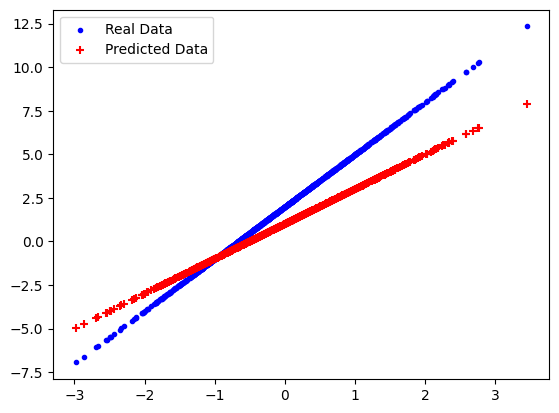

Current loss: 1.938450


In [ ]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

### Define a training loop

With the defined network and the synthesized training data in place, let's train the model using gradient descent. This method iteratively updates the trainable weights w and b to minimize the loss.

Although there are many sophisticated variants of the gradient descent method encapsulated in TensorFlow's `tf.train.Optimizer`, we will take a foundational approach in this tutorial. By building from first principles, we will gain a deeper understanding of the underlying mechanics:

- Utilize `tf.GradientTape` to track the computation and automatically differentiate to obtain gradients.
- Apply `tf.assign_sub` for updating the values of w and b. This function effectively combines the operations of `tf.assign` and `tf.sub`, decrementing the variable by the specified value.

In [ ]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

Finally, as part of our training process, we will iteratively run through the training data to observe how the parameters w and b evolve over time. By repeatedly applying the updates derived from gradient descent, we can visually track the improvements in w and b as the model learns from the data. This step not only demonstrates the effectiveness of our training approach but also provides insight into the dynamics of model optimization

In [ ]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.93845
Epoch  1: w=2.19 b=1.19, loss=1.25977
Epoch  2: w=2.35 b=1.35, loss=0.81871
Epoch  3: w=2.48 b=1.48, loss=0.53207
Epoch  4: w=2.58 b=1.58, loss=0.34578
Epoch  5: w=2.66 b=1.66, loss=0.22472
Epoch  6: w=2.73 b=1.73, loss=0.14604
Epoch  7: w=2.78 b=1.78, loss=0.09491
Epoch  8: w=2.82 b=1.82, loss=0.06168
Epoch  9: w=2.86 b=1.86, loss=0.04009
Epoch 10: w=2.88 b=1.88, loss=0.02605
Epoch 11: w=2.91 b=1.91, loss=0.01693
Epoch 12: w=2.92 b=1.92, loss=0.01100
Epoch 13: w=2.94 b=1.94, loss=0.00715
Epoch 14: w=2.95 b=1.95, loss=0.00465


Alongside tracking loss metrics, we'll also plot the progression of trainable variables over epochs. This helps us understand how model parameters adjust and stabilize throughout the training process.

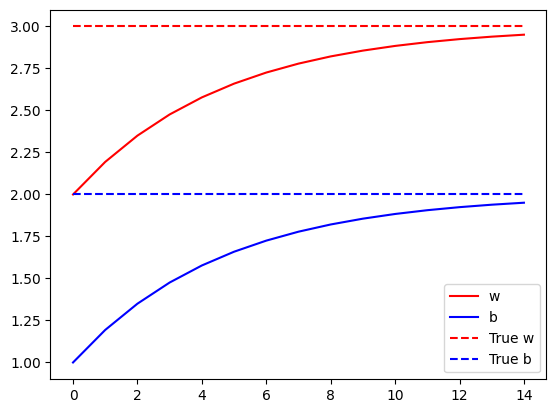

In [ ]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Plots for Evaluation
Now, let's visualize the performance of our trained model on a set of random test examples. Plot the actual outputs in red and the model's predictions in blue. This visualization will clearly show how the model's predictions align with the actual data. From this, we can observe that the model is capable of making predictions on the test set with a fair degree of accuracy. This confirms the effectiveness of our training process and the model's ability to generalize to new, unseen data.

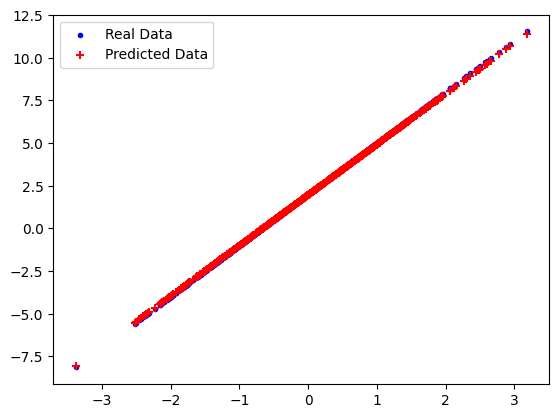

In [ ]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

To deepen our understanding of the training dynamics, we will visualize the cost function against the values of each of the trainable weights (w and b) that the model approximated over time. This plot will illustrate how the cost function decreases as the model parameters adjust through each iteration. By tracking these changes, we can visually assess the optimization process, seeing clearly how the updates to w and b contribute to minimizing the overall loss of the model. This is an excellent way to validate the effectiveness of our gradient descent implementation and the model's convergence.

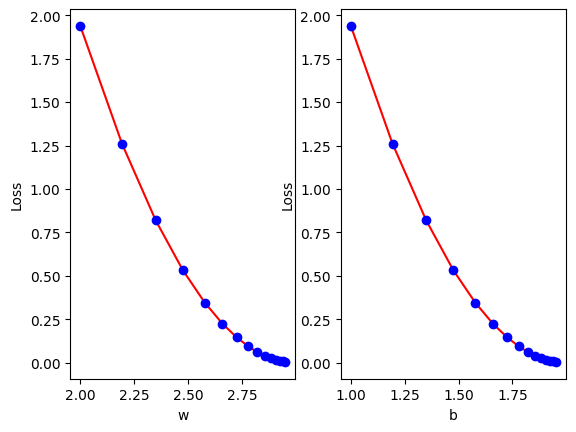

In [ ]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')


weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)